https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

# Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Import data

In [74]:
type_table = {"Code": "int32", "Year": "int32", "Sales": "float32", "Bills": "int16"}
df_raw = pd.read_csv("sales_and_bills.csv", index_col=False)
# df_raw.info

      Code  Year        Sales  Bills
0      110  1999  16147961.00    180
1      110  2000  45873960.00    267
2      110  2001  40402180.00    214
3      110  2002    232776.31    218
4      110  2003    331355.00    316
...    ...   ...          ...    ...
9697  8871  2018      4069.24      4
9698  8871  2019      7874.48      2
9699  8871  2020      3694.29      1
9700  8871  2021      3879.01      1
9701  8871  2022      5077.61      3

[9702 rows x 4 columns]


# Some Visualizations

(array([8.461e+03, 6.850e+02, 2.700e+02, 1.050e+02, 6.700e+01, 2.500e+01,
        1.100e+01, 1.900e+01, 7.000e+00, 3.000e+00, 7.000e+00, 1.000e+00,
        8.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

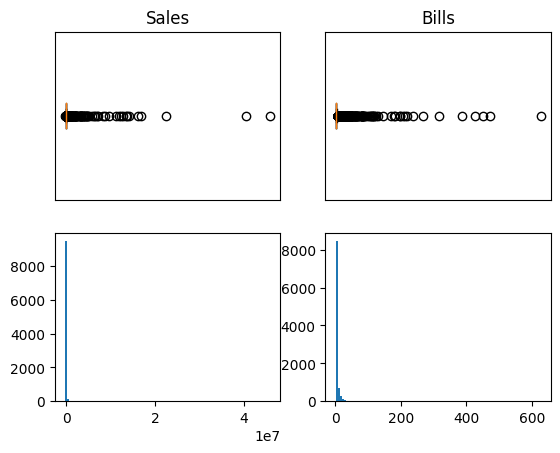

In [60]:
fig, axes = plt.subplots(2, 2)

# df_raw.boxplot(column='Sales', ax=axes[0, 0])
# df_raw.boxplot(column='Bills', ax=axes[0, 1])
axes[0, 0].boxplot(x=df_raw.Sales, vert=False, labels=[""])
axes[0, 0].set(title="Sales", xticklabels="", xticks=[], yticks=[])
axes[0, 1].boxplot(x=df_raw.Bills, vert=False, labels=[""])
axes[0, 1].set(title="Bills", xticklabels="", xticks=[], yticks=[])
axes[1, 0].hist(x=df_raw.Sales, bins=100)
axes[1, 1].hist(x=df_raw.Bills, bins=100)

# Tukey's IQR method

In [112]:
def iqr_outliers(df, features, n=1):
    """
    Takes a dataframe <df> and returns an index list corresponding to the observations
    containing more than or equal to <n> outliers in the listed <features> 
    according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # calculate 1st quartile
        Q1 = np.percentile(df[column], 25)
        # calculate 3rd quartile
        Q3 = np.percentile(df[column], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # outliers' indeces for a column
        outlier_list_column = df[
            (df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)
        ].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # counting number of outliers for an index
    outlier_list = Counter(outlier_list)
    #
    multiple_outliers = list(k for k, v in outlier_list.items() if v >= n)

    # Calculate the number of records below and above lower and above bound value respectively
    outliers = len(multiple_outliers)
    total = len(df.index)

    print(
        f"Outliers are {outliers} elements out of {total},  which is {outliers/total:.1%} of data."
    )

    return multiple_outliers

Outliers are 1623 elements out of 9702,  which is 16.7% of data.


(array([5.31e+03, 9.70e+02, 0.00e+00, 4.94e+02, 2.76e+02, 0.00e+00,
        1.76e+02, 0.00e+00, 1.33e+02, 8.80e+01, 0.00e+00, 7.00e+01,
        0.00e+00, 6.40e+01, 4.20e+01, 0.00e+00, 4.90e+01, 0.00e+00,
        1.27e+02, 7.00e+01, 0.00e+00, 5.00e+01, 3.00e+01, 0.00e+00,
        2.20e+01, 0.00e+00, 1.00e+01, 1.50e+01, 0.00e+00, 8.00e+00,
        0.00e+00, 7.00e+00, 1.50e+01, 0.00e+00, 7.00e+00, 0.00e+00,
        5.00e+00, 6.00e+00, 0.00e+00, 7.00e+00, 2.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 4.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

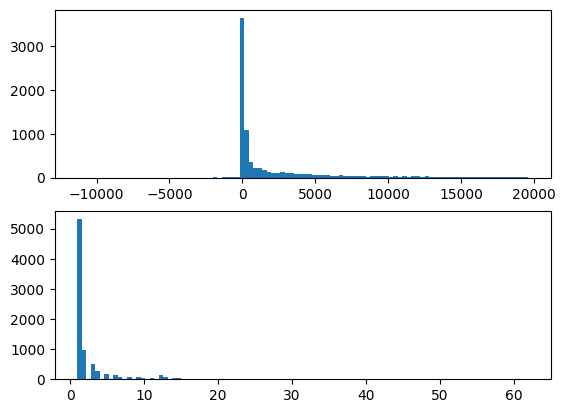

In [115]:
outliers_iqr = iqr_outliers(df_raw, ["Sales"], 1)

df_out = df_raw.drop(outliers_iqr, axis=0).reset_index(drop=True)

fig, axes = plt.subplots(2)
axes[0].hist(x=df_out.Sales, bins=100)
axes[1].hist(x=df_out.Bills, bins=100)

# Standard deviation method

In [ ]:
def StDev_outliers (df, features, n=1, cutoff=3):
    """
    Takes a dataframe <df> and returns an index list corresponding to the observations
    containing more than or equal to <n> outliers in the listed <features> 
    according to the standard deviation method. The cutoff value <cutoff> in St. deviations.
    """
    